In [1]:
import sys

sys.path.append("..")

import jax
import jax.numpy as jnp
from input_pipeline import dataloader
from qm9 import load_qm9

In [2]:
molecules = load_qm9("qm9_data")[:2]
atomic_numbers = jnp.array([1, 6, 7, 8, 9])
epsilon = 0.1  # Angstroms
cutoff = 5.0  # Angstroms

loader = dataloader(jax.random.PRNGKey(0), molecules, atomic_numbers, epsilon, cutoff, 10, 20, 10)


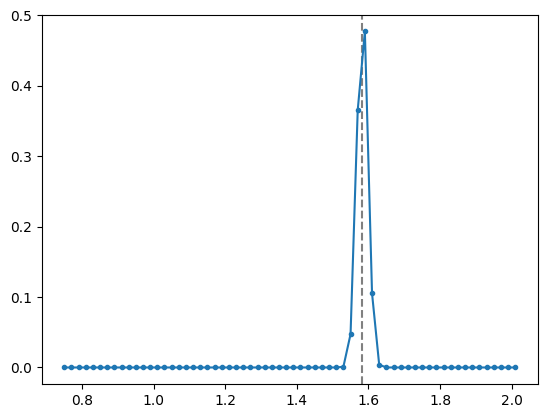

In [19]:
RADII = jnp.arange(0.75, 2.03, 0.02)
target_position = 1.583
radius_rbf_variance = (0.015)**2
radius_weights = jax.vmap(
        lambda radius: jnp.exp(
            -((radius - jnp.linalg.norm(target_position)) ** 2)
            / (2 * radius_rbf_variance)
        )
    )(RADII)
radius_weights = radius_weights / jnp.sum(radius_weights)

import matplotlib.pyplot as plt
plt.axvline(target_position, color="gray", linestyle="--")
plt.plot(RADII, radius_weights, '.-');

In [16]:
0.02**2

0.0004

In [4]:
graphs = next(loader)

print(f"{len(graphs.n_node)} graphs")
print(f"{graphs.n_node.sum()} nodes: {graphs.n_node}") 
print(f"{graphs.n_edge.sum()} edges: {graphs.n_edge}")

10 graphs
10 nodes: [4 2 2 2 0 0 0 0 0 0]
16 edges: [12  2  2  0  0  0  0  0  0  0]


In [5]:
shapes = []

for _ in range(200):
    graphs = next(loader)

    shapes.append((len(graphs.n_node), graphs.n_node.sum(), graphs.n_edge.sum()))

In [6]:
set(shapes)

{(10, 3, 2),
 (10, 4, 2),
 (10, 4, 6),
 (10, 6, 4),
 (10, 6, 6),
 (10, 6, 8),
 (10, 6, 12),
 (10, 6, 20),
 (10, 8, 2),
 (10, 8, 6),
 (10, 8, 8),
 (10, 8, 12),
 (10, 8, 16),
 (10, 8, 20),
 (10, 10, 8),
 (10, 10, 12),
 (10, 10, 16),
 (10, 10, 20)}